# Labeling the news with the dollar variation

Now we ave to label each news with the respective dollar variation

## Importing the libraries and loading the FastText model

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from gensim.models import KeyedVectors

word_vec_model = KeyedVectors.load_word2vec_format('../datasets/word-vectors/wiki.pt/wiki.pt.vec')

word_vec_model

import matplotlib.pyplot as plt 

Using TensorFlow backend.
W1102 14:57:55.930065 4486411712 doc2vec.py:74] Slow version of gensim.models.doc2vec is being used
W1102 14:57:56.011126 4486411712 smart_open_lib.py:385] this function is deprecated, use smart_open.open instead


## Importing and indexing the dollar dataframe

In [2]:
dolar_rates_df = pd.read_csv('../datasets/pre-processed/dolar_rates.csv')

dolar_rates_df = dolar_rates_df.set_index("quote_timestamp")

dolar_rates_df.tail(5)

,variation
quote_timestamp,
2019-08-29 10:09:17.705,up
2019-08-29 11:10:17.541,up
2019-08-29 12:11:17.181,down
2019-08-29 13:09:45.961,down
2019-08-29 13:09:45.964,up


## Importing and indexing the news dataframe

In [3]:
news_df = pd.read_csv('../datasets/pre-processed/news.csv')
news_df = news_df.set_index("date_published")

news_df.head(5)

,text
date_published,
2019-08-29 16:01:00,"em esforço para negar desgaste, bolsonaro cham..."
2019-08-28 12:10:00,câmara e senado travam nova guerra por pauta e...
2019-08-28 08:09:00,sentença em caso do sítio usado por lula é sem...
2019-08-27 19:52:00,"sob pressão, relator desiste da proposta de en..."
2019-08-28 12:30:00,congresso tenta blindar reformas e projetos de...


## Reindexing the dollar dataframe by the nearest news timestamp

In [4]:
dolar_rates_df = dolar_rates_df.reindex(news_df.index, method='backfill')

dolar_rates_df = dolar_rates_df.loc[~dolar_rates_df.index.duplicated(keep='first')]

dolar_rates_df.head(10)

,variation
date_published,
2019-08-29 16:01:00,NaN
2019-08-28 12:10:00,up
2019-08-28 08:09:00,up
2019-08-27 19:52:00,up
2019-08-28 12:30:00,up
2019-08-28 09:04:00,up
2019-08-28 15:58:00,up
2019-08-27 19:30:00,up
2019-08-28 15:17:00,up


## Joining the two dataframes by their indexes

In [5]:
news_df = news_df.join(dolar_rates_df)
news_df = news_df.reset_index()
news_df = news_df.drop(['date_published'], axis=1)
news_df = news_df.dropna(subset=['variation'])

news_df = news_df[news_df.variation != 'steady']

news_df.head(5)

,text,variation
1,candidato do prtb em sp defende máquina menor,down
2,distanciamento de alckmin em são paulo esfria ...,down
3,"bank of america projeta dólar em r$ 5,50 depoi...",down
4,indústria apresenta proposta de reforma tribut...,up
5,"meirelles não pode ter vergonha de temer, afir...",up


# Tokenizing the text

Transforming all the news texts into sequences of numbers

## Extracting the text from the dataframe

In [6]:
news_text = news_df.drop(['variation'], axis = 1).to_numpy()
news_text = np.squeeze(np.asarray(news_text))
news_text

array(['candidato do prtb em sp defende máquina menor',
       'distanciamento de alckmin em são paulo esfria sua relação com márcio frança',
       'bank of america projeta dólar em r$ 5,50 depois das eleições',
       ...,
       'empresa dona das marcas kipling, timberland e vans confirma suspensão de compra de couro brasileiro',
       'lava jato "tem coisas que foram verdade" e não deve ser totalmente anulada, diz lula',
       'delegada da pf ordenou grampo clandestino na lava jato, mas só agente foi punido'],
      dtype=object)

## Transforming all the texts into sequences of tokens

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(news_text)

sequences = tokenizer.texts_to_sequences(news_text)

sequences

[[170, 6, 2521, 7, 81, 75, 2522, 435],
 [2523, 1, 63, 7, 69, 86, 2524, 257, 281, 11, 736, 187],
 [1546, 1334, 1547, 2525, 104, 7, 32, 210, 619, 737, 105, 493],
 [436, 738, 123, 1, 18, 227, 10, 437],
 [438, 16, 39, 72, 2526, 1, 50, 80, 1007],
 [2, 75, 1335, 7, 194, 3, 4, 9, 620, 3692, 3693, 1955],
 [438, 621, 57, 3, 4, 9, 106, 1548, 99, 1336, 1956, 6, 12, 739],
 [100, 299, 50, 1, 3694, 3, 17, 3695, 25, 1957, 3696, 10, 18, 563],
 [63, 4, 9, 1549, 11, 20, 468, 45, 3697, 110, 171, 1, 1337],
 [101, 405, 3, 892, 1, 437, 14, 1008],
 [2, 406, 211, 8, 2527, 57, 3, 4, 9, 1958, 17, 494, 9, 20, 525, 495],
 [187, 4, 9, 1151, 1959, 10, 117, 3, 740, 10, 100, 670],
 [202, 671, 10, 23, 1152, 7, 281, 10, 437],
 [52, 23, 3698, 10, 63, 3, 4, 9, 564, 331, 31, 1153, 14, 272, 407],
 [53, 3699, 202, 125, 23, 3700, 8, 806, 218, 1, 2528],
 [3701, 219, 385, 258, 228, 2529, 11, 807, 2530],
 [1960, 1, 2531, 3702, 2532, 2533, 3, 332, 6, 371, 8, 2534, 25, 12, 1, 386],
 [1338, 808, 1339, 14, 37, 44, 1009, 300],
 [20,

# Padding the sequences to insure a default length

All the sequence should have the same length in order to feed it into the Neural Network, so we take the lenght of the longest sequence as our default length and pad all the other sequences to match that length.

In [8]:
word_index = tokenizer.word_index
MAX_SEQUENCE_LENGTH = len(max(sequences, key=len))
print('Number of unique words:', len(word_index))
print('Max sequence length: ', MAX_SEQUENCE_LENGTH)

features = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

features

Number of unique words: 7563
Max sequence length:  20


array([[   0,    0,    0, ...,   75, 2522,  435],
       [   0,    0,    0, ...,   11,  736,  187],
       [   0,    0,    0, ...,  737,  105,  493],
       ...,
       [   0,    0,    0, ...,    1, 1925,  534],
       [   0,    0,    0, ..., 3688,    4,   57],
       [   0,    0,    0, ..., 7562,  106, 7563]], dtype=int32)

# Creating the embedding matrix

That matrix link the word token with the word vector representation in FastText. That matrix will be used to feed the Embedding layer of the neural network in order to pre load it with the FastText vectors.

In [9]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))

for word, i in word_index.items():
    try:
        embedding_vector = word_vec_model[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        pass
    
embedding_matrix.shape

(7564, 300)

# Extracting the labels

In [10]:
news_df['variation'] = news_df['variation'].apply(lambda variation: int(1) if variation == 'up' else int(0))


labels = news_df[['variation']].to_numpy()

labels

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

# Plotting the classes distribution accross the dataset

(array([2435.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2457.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

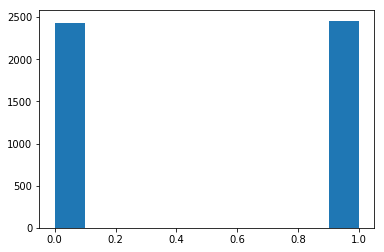

In [11]:
plt.hist(labels)

In [12]:
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 2435, 1: 2457}

# Saving the final datasets into files

In [13]:
np.savetxt("../datasets/final-data/features.csv", features, delimiter=",")
np.savetxt("../datasets/final-data/labels.csv", labels, delimiter=",")
np.savetxt('../datasets/final-data/embedding_matrix.csv', embedding_matrix, delimiter=',')